In [17]:
# import the libarary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [18]:
# import the data set
df = pd.read_csv("D:\\adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
# EDA process
# lets check the missing value
df.isnull().sum() # there is no null value .

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

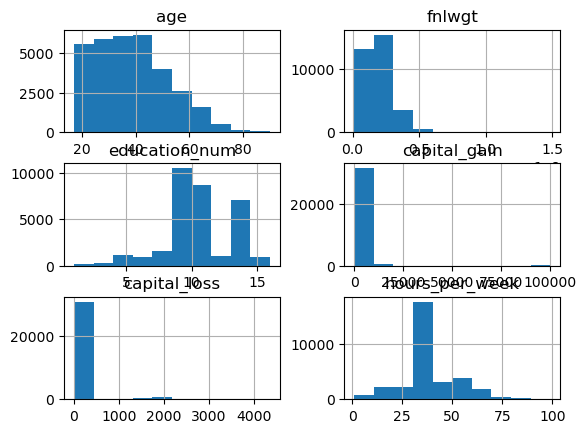

In [21]:
# visulaize the data
df.hist()

<Axes: >

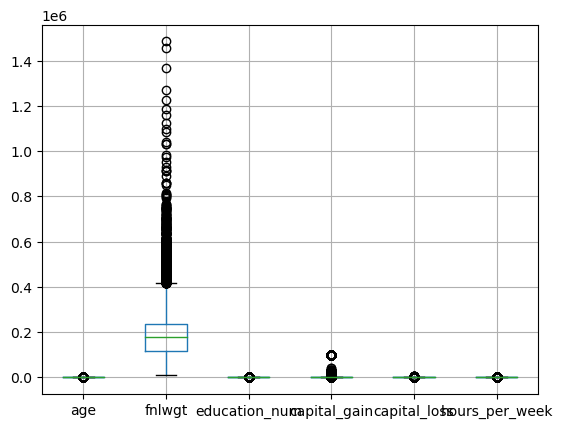

In [22]:
df.boxplot()# it will show the outlier in the dataset.

In [23]:
# scaling down the data
df.select_dtypes(include = 'number')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [24]:
std = StandardScaler()
scaled_data = std.fit_transform(df.select_dtypes(include = 'number'))

In [25]:
scaled_data

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [26]:
# deloped the PCA model
pca = PCA()
X_pca = pca.fit_transform(scaled_data)

In [27]:
X_pca

array([[ 8.46167400e-01, -2.00697677e-01, -5.09771513e-01,
        -1.01305430e+00,  4.49398427e-01, -4.95672921e-01],
       [-9.71953531e-02, -9.03884322e-01, -1.15644254e+00,
        -1.97902801e-01,  1.82081336e+00, -1.57915547e+00],
       [-4.35844113e-01,  1.01773579e-01, -4.08319129e-02,
         1.92435505e-01, -2.52459994e-01,  7.11942301e-02],
       ...,
       [ 2.53291930e-01, -7.40773999e-01, -9.20671824e-01,
         7.99098808e-01, -4.51693384e-01, -3.13368475e-01],
       [-1.68608074e+00,  2.23264262e-01, -1.44766023e-04,
        -4.04972270e-01,  1.18993106e+00,  4.35941855e-02],
       [ 6.57837230e-01,  1.17679386e+00, -7.41226231e-01,
         1.69717032e+00,  3.57763608e-01,  4.97829697e-01]])

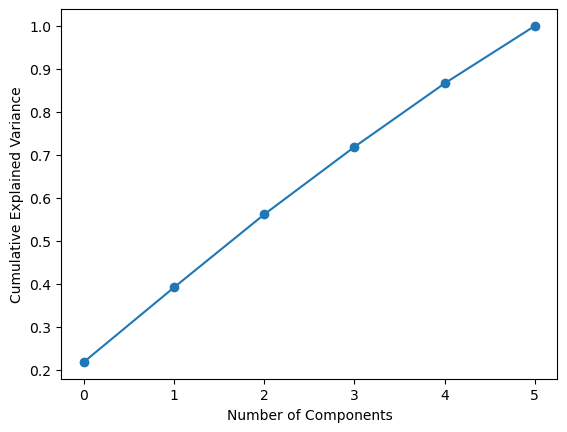

In [28]:
# visualize the pca modelfor better explanation
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [29]:
# develop the k-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans.fit_predict(scaled_data)

C:\Users\soham\New folder\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


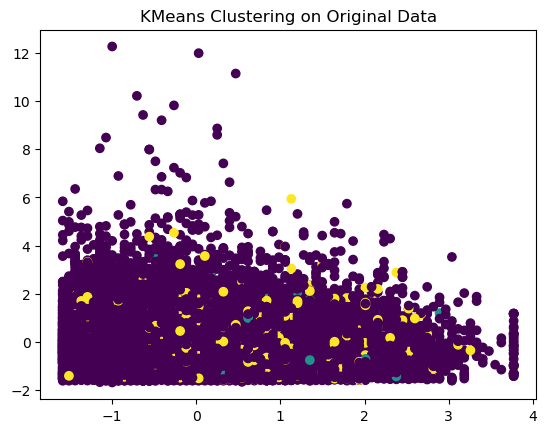

In [30]:
# visaulaize the k-means clustering model using scatter plot

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_orig, cmap='viridis')
plt.title("KMeans Clustering on Original Data")
plt.show()

In [31]:
# genrate the silhouette score
silhouette_score(scaled_data, labels_orig)

0.5251710958334667

In [34]:
# develop the model using k-means and PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)


C:\Users\soham\New folder\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
silhouette_score(X_pca, labels_orig)

0.5251710958334669

In [37]:
# comparison of the two model
print("\n=== Comparison ===")
print("Clusters on Original Data vs PCA Data")
print("Silhouette: Original =", silhouette_score(scaled_data, labels_orig),
      " PCA =", silhouette_score(X_pca, labels_orig))
print("Davies–Bouldin: Original =", davies_bouldin_score(scaled_data, labels_orig),
      " PCA =", davies_bouldin_score(X_pca, labels_orig))


=== Comparison ===
Clusters on Original Data vs PCA Data
Silhouette: Original = 0.5251710958334667  PCA = 0.5251710958334669
Davies–Bouldin: Original = 0.6159045604383708  PCA = 0.615904560438386


In [38]:
# conclusion of the project
'''When PCA helps: Use PCA before clustering when you have high-dimensional data, many correlated features, or you need speed/noise reduction. PCA can improve clustering stability and reduce runtime.

When it can hurt: If interpretability is crucial (you want cluster centers or assignments explained in original features), PCA mixes features into components and makes interpretation harder.

Practical trade-off: If dimensionality is moderate and interpretability matters → cluster original features (optionally after feature selection/normalization). If dimensionality is high or features are noisy → do PCA, pick components by cumulative explained variance (common thresholds: 80%-95%), then cluster.

Model selection: Use silhouette score and Davies–Bouldin to pick k; use ARI or contingency tables to compare clusterings.'''

'When PCA helps: Use PCA before clustering when you have high-dimensional data, many correlated features, or you need speed/noise reduction. PCA can improve clustering stability and reduce runtime.\n\nWhen it can hurt: If interpretability is crucial (you want cluster centers or assignments explained in original features), PCA mixes features into components and makes interpretation harder.\n\nPractical trade-off: If dimensionality is moderate and interpretability matters → cluster original features (optionally after feature selection/normalization). If dimensionality is high or features are noisy → do PCA, pick components by cumulative explained variance (common thresholds: 80%-95%), then cluster.\n\nModel selection: Use silhouette score and Davies–Bouldin to pick k; use ARI or contingency tables to compare clusterings.'